In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'   # retina for sharper images

## Horizontal Stacked Bar Chart

In [2]:
# use revenue and profits data for the top 10 global companies
# Make stacked bar chart or horizontal positioning

df = pd.read_csv("data/top10_revenue.csv")
df

,Name,Revenue,Profits
0,Walmart,523964,14881.0
1,Sinopec Group,407009,6793.2
2,State Grid,383906,7970.0
3,China National Petroleum,379130,4443.2
4,Royal Dutch Shell,352106,15842.0
5,Saudi Aramco,329784,88210.9
6,Volkswagen,282760,15542.0
7,BP,282616,4026.0
8,Amazon.com,280522,11588.0
9,Toyota Motor,275288,19096.2


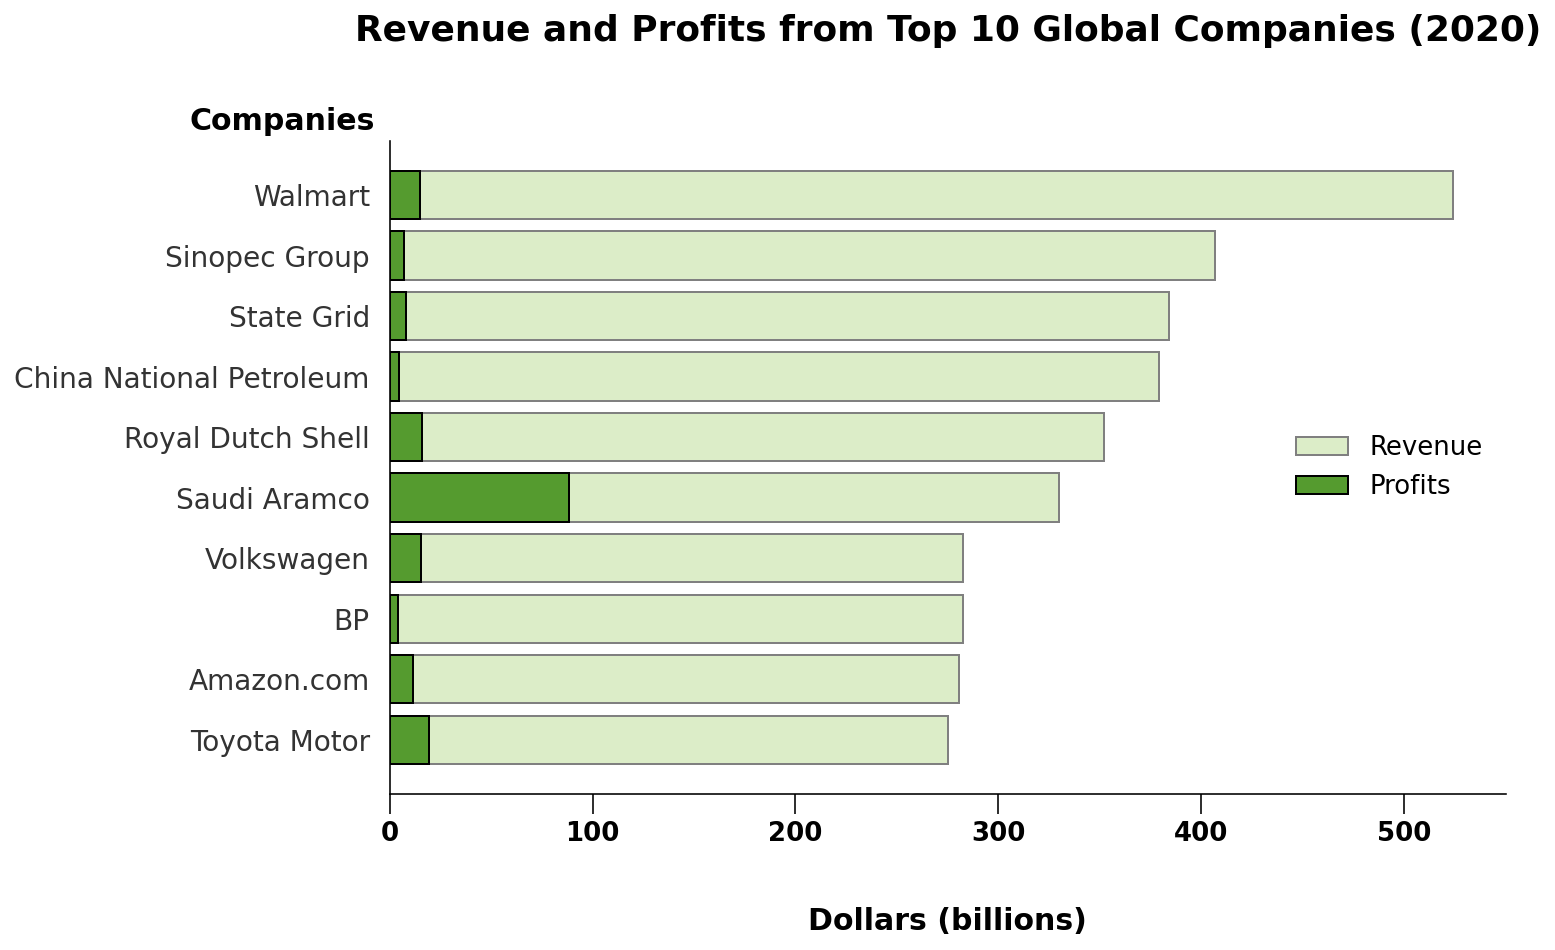

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

# Change colors to the bars - Green = profit, light green = revenue
bar_containers = ax.barh(
    df['Name'], df['Revenue']/1000, label='Revenue', color='#dcedc8')
bar_containers_2 = ax.barh(
    df['Name'], df['Profits']/1000, label='Profits', color='#559b2f')

# Invert axis so it is sorted
ax.invert_yaxis()

# Set title and label
ax.set_title("Revenue and Profits from Top 10 Global Companies (2020)",
             horizontalalignment='center', pad=50,
             fontweight='bold', fontsize=18)

plt.suptitle("Companies", x=0.05, y=0.92, fontsize=15, fontweight='bold')

ax.set_xlabel("Dollars (billions)", fontsize=15,
              labelpad=30, fontweight='bold')

# Set tick parameters
ax.tick_params(axis='both', labelsize=13, )

# X-tick params: Extend x-tick marks, font, fontsize
ax.tick_params(axis='x', which='major', length=10)

for label in ax.get_xticklabels():
    label.set_fontweight("bold")

# Y-tick params: Remove  y-tick marks, extend padding, bold, fontsize
ax.tick_params(axis='y', which='major', length=0, pad=10, labelsize=12)

for label in ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_color('black')
    label.set_alpha(0.8)

# Add borders to the bars
for rect in bar_containers.patches:
    rect.set_linewidth(1)
    rect.set_edgecolor('grey')

for rect in bar_containers_2.patches:
    rect.set_linewidth(1)
    rect.set_edgecolor('black')

# Add legend: Make legend bigger, remove borders, set location
plt.legend(loc='right', fontsize=13, frameon=False)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Vertical Stacked Bar Chart

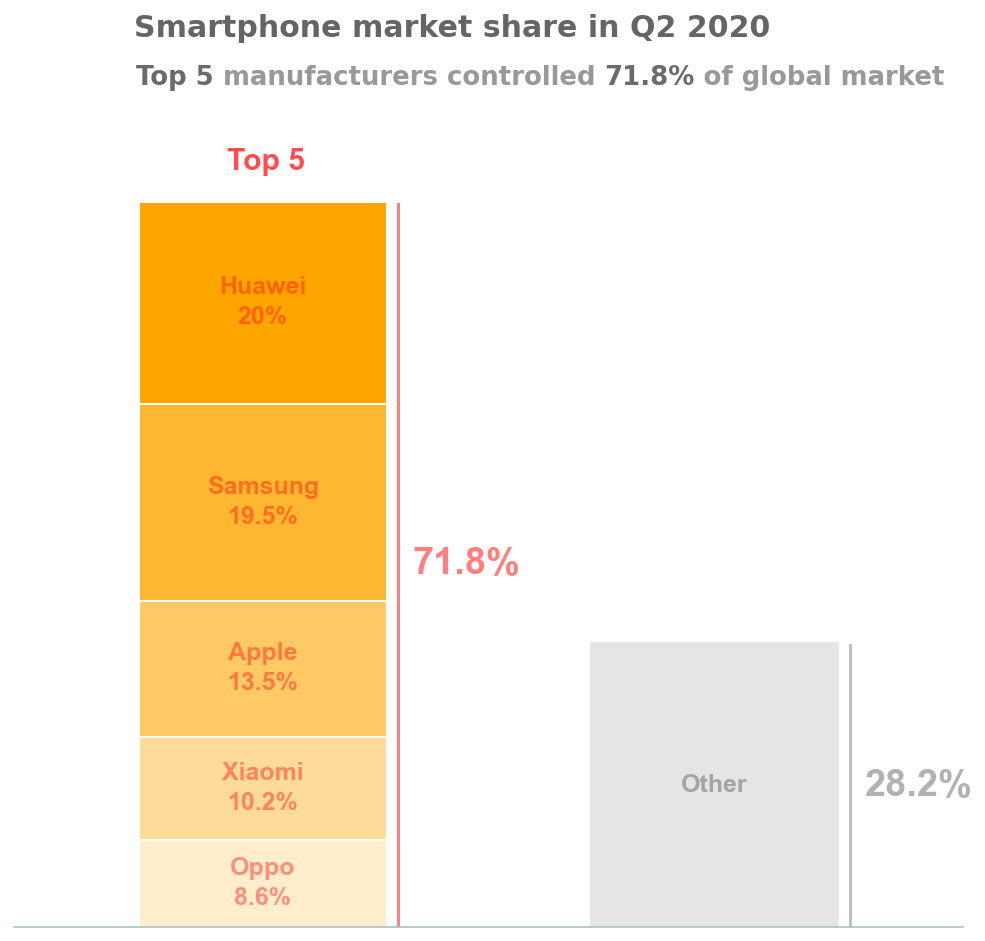

In [4]:
fig, ax = plt.subplots(figsize=(8.5, 7))

# data
market = {'Oppo': 8.6, 'Xiaomi': 10.2,
          'Apple': 13.5, 'Samsung': 19.5, 'Huawei': 20}

yticks = []
yticks_2 = []
margin_bottom = 0
font = {'fontname': 'Arial'}
color = ['#ffedcc', '#ffdb99', '#ffc966', '#ffb732', '#ffa500']
i = 0

# Draw stacked bar plot, the bottom of each segment is the sum of previous segments
for manufacturer, share in market.items():
    ax.bar('Top 5', share, bottom=margin_bottom,
           width=0.55, color=color[i], edgecolor='white')
    # the location for y ticks labels and percentage
    yticks.append(margin_bottom+share/2)
    yticks_2.append(margin_bottom+share/2)
    margin_bottom += share
    i += 1

# draw second bar
ax.bar('Other', 28.2, width=0.55, color='grey', alpha=0.2)

# Add label for the first bar
for name, loc in zip(market.keys(), yticks):
    ax.text(0, loc+1.5, name, fontsize=12.5,
            color='#ff0000', alpha=0.4, ha='center', va='center', weight='bold', **font)
for name, loc in zip(market.values(), yticks):
    ax.text(0, loc-1.5, '{}%'.format(name), fontsize=12.5,
            color='#ff0000', alpha=0.4, ha='center', va='center', weight='bold', **font)
# add label for the second bar
ax.text(1, 14, 'Other', fontsize=12.5,
        color='#646566', ha='center', va='center', alpha=0.5, weight='bold', **font)

# Add vertical lines and percentage
ax.axvline(0.3, ymax=0.95, ymin=0, color='red', alpha=0.5)
ax.axvline(1.3, ymax=0.37, ymin=0, color='grey', alpha=0.5)
ax.text(0.33, 35, "71.8%", fontsize=19, color='red',
        alpha=0.5, weight='bold', **font)
ax.text(1.33, 13, "28.2%", fontsize=19, color='grey',
        alpha=0.6, weight='bold', **font)

# Adjust axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis='y', which='major', length=0, left=False)
ax.tick_params(axis='x', which='major', bottom=False)
ax.set_xlim([-0.55, 1.55])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#abbebe')

# titles
ax.text(-0.08, 75, 'Top 5', fontsize=15, alpha=0.7,
        weight='bold', color='red', family='Georgia', **font)
plt.suptitle('Smartphone market share in Q2 2020', x=0.483,
             y=1.03, fontsize=15, weight='bold', alpha=0.6)
plt.title('manufacturers controlled            of global market',
          x=0.6, y=1.09, weight='bold', alpha=0.4, fontsize=13)
ax.text(-0.28, 83.4, 'Top 5', fontsize=13,
        weight='bold', color='black', alpha=0.58)
ax.text(0.755, 83.4, '71.8%', fontsize=13,
        weight='bold', color='black', alpha=0.58)

plt.show()

## Line Plot

In [5]:
# data
justice = pd.read_csv('data/justices.csv')

justice = justice[['term', 'justiceName', 'post_mn']]
justice = justice[(justice['justiceName'] == 'AMKennedy') |
                  (justice['justiceName'] == 'AScalia') |
                  (justice['justiceName'] == 'CThomas') |
                  (justice['justiceName'] == 'DHSouter') |
                  (justice['justiceName'] == 'EKagan') |
                  (justice['justiceName'] == 'JGRoberts') |
                  (justice['justiceName'] == 'JPStevens') |
                  (justice['justiceName'] == 'RBGinsburg') |
                  (justice['justiceName'] == 'SAAlito') |
                  (justice['justiceName'] == 'SDOConnor') |
                  (justice['justiceName'] == 'SGBreyer') |
                  (justice['justiceName'] == 'SSotomayor') |
                  (justice['justiceName'] == 'WHRehnquist')]

Kennedy = justice[justice['justiceName'] == 'AMKennedy']
Scalia = justice[justice['justiceName'] == 'AScalia']
Thomas = justice[justice['justiceName'] == 'CThomas']
Kagan = justice[justice['justiceName'] == 'EKagan']
Roberts = justice[justice['justiceName'] == 'JGRoberts']
Ginsburg = justice[justice['justiceName'] == 'RBGinsburg']
Alito = justice[justice['justiceName'] == 'SAAlito']
Breyer = justice[justice['justiceName'] == 'SGBreyer']
Sotomayor = justice[justice['justiceName'] == 'SSotomayor']

name = {'Kennedy': Kennedy, 'Roberts': Roberts, 'Alito': Alito, 'Scalia': Scalia, 'Thomas': Thomas,
        'Kagan': Kagan, 'Breyer': Breyer, 'Ginsburg': Ginsburg, 'Sotomayor': Sotomayor}
color = ['#ffb2b2', '#ff7f7f', '#ff6666', '#ff0000',
         '#b20000', '#ccccff', '#9999ff', '#4c4cff', '#0000b2']

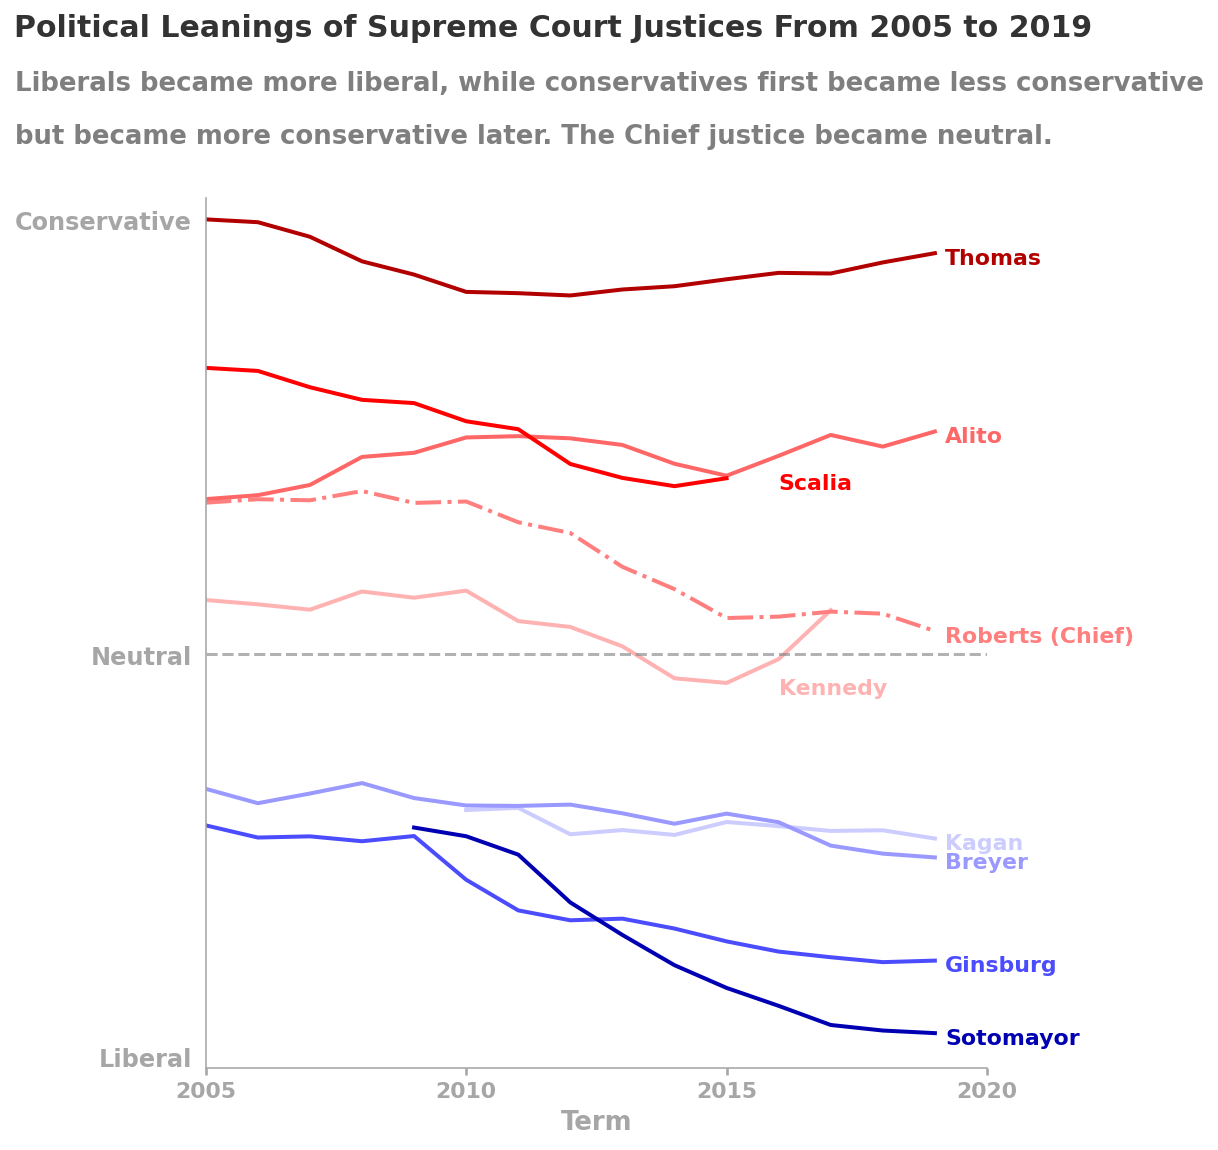

In [6]:
fig, ax = plt.subplots(figsize=(7, 8))
i = 0

# draw lines, label directly
for n, df in name.items():
    if n == 'Roberts':
        ax.plot(df['term'], df['post_mn'], color=color[i], ls='-.', lw=2)
        ax.text(2019.2, float(df[df['term'] == 2019]['post_mn'].values) -
                0.1, n+' (Chief)', color=color[i], weight='bold', fontsize=11)
    elif n == 'Scalia' or n == 'Kennedy':
        ax.plot(df['term'], df['post_mn'], color=color[i], lw=2)
        ax.text(2016, float(df[df['term'] == 2015]['post_mn'].values) -
                0.1, n, color=color[i], weight='bold', fontsize=11)
    else:
        ax.plot(df['term'], df['post_mn'], color=color[i], lw=2)
        ax.text(2019.2, float(df[df['term'] == 2019]['post_mn'].values) -
                0.1, n, color=color[i], weight='bold', fontsize=11)
    i += 1

# adjust axis
ax.set_xlim([2005, 2020])
ax.set_ylim([-3.8, 4.2])
ax.set_yticks([-3.7, 0, 4])
ax.set_yticklabels(['Liberal', 'Neutral', 'Conservative'])
ax.set_xticks([2005, 2010, 2015, 2020])
ax.set_xlabel('Term', color='#a6a6a6', fontsize=13, weight='bold')

ax.axhline(0, xmax=3, xmin=0, ls='--', color='grey', alpha=0.6)

ax.tick_params(axis='y', which='major', left=False)
ax.tick_params(axis='x', which='major', color='#a6a6a6', width=1.3)
for label in ax.get_xticklabels():
    label.set_fontsize(11)
    label.set_fontweight('bold')
    label.set_color('#a6a6a6')
for label in ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_fontweight('bold')
    label.set_color('#a6a6a6')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#a6a6a6')
ax.spines['bottom'].set_color('#a6a6a6')
fig.set_facecolor('white')

# titles
plt.suptitle('Political Leanings of Supreme Court Justices From 2005 to 2019',
             x=0.47, y=1.04, fontsize=15, weight='bold', alpha=0.8)
plt.title('Liberals became more liberal, while conservatives first became less conservative',
          x=0.517, y=1.11, weight='bold', alpha=0.5, fontsize=13)
ax.text(2001.33, 4.7, 'but became more conservative later. The Chief justice became neutral.',
        weight='bold', alpha=0.5, fontsize=13)

plt.show()

## Subplots

In [7]:
df_life = pd.read_csv('data/life-expectancy.csv')
df_life.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


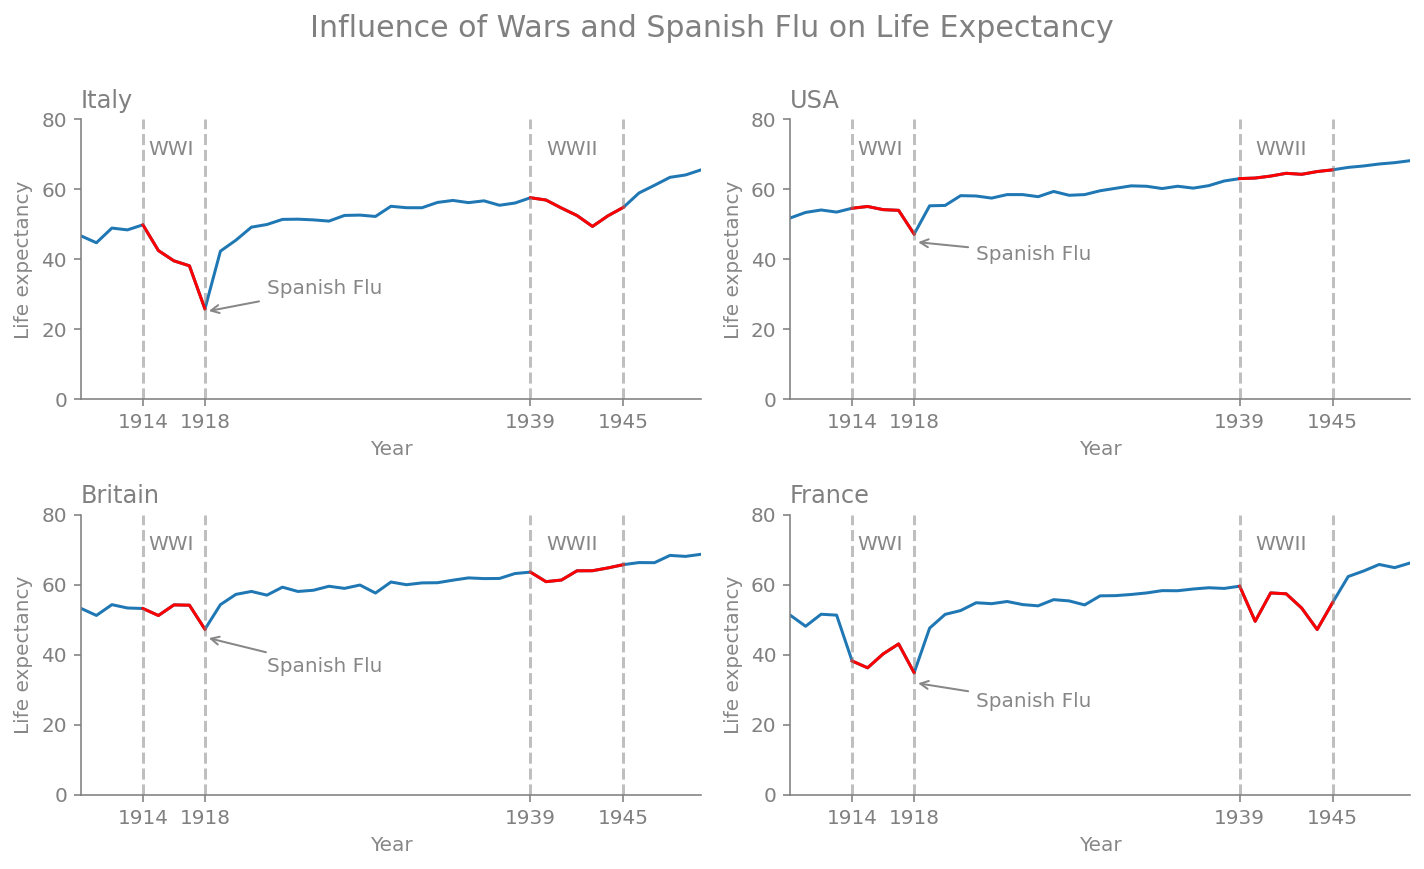

In [8]:
# grab life expectancies for each country of interest
df_bri_life = df_life[df_life.Entity == 'United Kingdom']
df_usa_life = df_life[df_life.Code == 'USA']
df_fra_life = df_life[df_life.Code == 'FRA']
df_ita_life = df_life[df_life.Entity == 'Italy']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

lg = '#808080'  # color

# individual plot for each country
df_ita_life.plot(x='Year', y='Life expectancy', legend=False, ax=ax1)
df_ita_life = df_ita_life.set_index(df_ita_life['Year'])
# use red color to indicate war periods
ax1.plot(range(1914, 1919), df_ita_life.loc[1914:1918, [
         'Life expectancy']], color='red')
ax1.plot(range(1939, 1946), df_ita_life.loc[1939:1945, [
         'Life expectancy']], color='red')

df_usa_life.plot(x='Year', y='Life expectancy', legend=False, ax=ax2)
df_usa_life = df_usa_life.set_index(df_usa_life['Year'])
ax2.plot(range(1914, 1919), df_usa_life.loc[1914:1918, [
         'Life expectancy']], color='red')
ax2.plot(range(1939, 1946), df_usa_life.loc[1939:1945, [
         'Life expectancy']], color='red')

df_bri_life.plot(x='Year', y='Life expectancy', legend=False, ax=ax3)
df_bri_life = df_bri_life.set_index(df_bri_life['Year'])
ax3.plot(range(1914, 1919), df_bri_life.loc[1914:1918, [
         'Life expectancy']], color='red')
ax3.plot(range(1939, 1946), df_bri_life.loc[1939:1945, [
         'Life expectancy']], color='red')

df_fra_life.plot(x='Year', y='Life expectancy', legend=False, ax=ax4)
df_fra_life = df_fra_life.set_index(df_fra_life['Year'])
ax4.plot(range(1914, 1919), df_fra_life.loc[1914:1918, [
         'Life expectancy']], color='red')
ax4.plot(range(1939, 1946), df_fra_life.loc[1939:1945, [
         'Life expectancy']], color='red')


def axis_plot(ax):
    # Remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_color(lg)
    ax.spines['left'].set_color(lg)

    # vertical lines and text to indicate war periods
    ax.axvline(1914, color='grey', alpha=0.5, linestyle='dashed')
    ax.axvline(1918, color='grey', alpha=0.5, linestyle='dashed')
    ax.axvline(1939, color='grey', alpha=0.5, linestyle='dashed')
    ax.axvline(1945, color='grey', alpha=0.5, linestyle='dashed')
    ax.text(1914.35, 70, 'WWI', horizontalalignment='left', color='#878787')
    ax.text(1940, 70, 'WWII', horizontalalignment='left',
            color='#878787', size=10)

    ax.set_ylim([0, 80])
    ax.set_xlim([1910, 1950])
    ax.tick_params(axis='x', colors=lg)
    ax.tick_params(axis='y', colors=lg)
    ax.set_xticks([1914, 1918, 1939, 1945])
    ax.set_xlabel('Year', color='#878787')
    ax.set_ylabel('Life expectancy', color='#878787')

    return ax


# annotation
ax1.annotate('Spanish Flu', xy=(1918, 25), xytext=(1922, 30), color='#878787',
             arrowprops=dict(color='#878787', arrowstyle='->'))
ax2.annotate('Spanish Flu', xy=(1918, 45), xytext=(1922, 40), color='#878787',
             arrowprops=dict(color='#878787', arrowstyle='->'))
ax3.annotate('Spanish Flu', xy=(1918, 45), xytext=(1922, 35), color='#878787',
             arrowprops=dict(color='#878787', arrowstyle='->'))
ax4.annotate('Spanish Flu', xy=(1918, 32), xytext=(1922, 25), color='#878787',
             arrowprops=dict(color='#878787', arrowstyle='->'))

ax1 = axis_plot(ax1)
ax2 = axis_plot(ax2)
ax3 = axis_plot(ax3)
ax4 = axis_plot(ax4)

# titles
plt.suptitle('Influence of Wars and Spanish Flu on Life Expectancy',
             y=1.0, size=15, color=lg)
ax1.set_title("Italy", loc='left', color=lg)
ax2.set_title("USA", loc='left', color=lg)
ax3.set_title("Britain", loc='left', color=lg)
ax4.set_title("France", loc='left', color=lg)

fig.set_facecolor('white')

plt.tight_layout()